#### Code: https://www.analyticssteps.com/blogs/what-naive-bayes-algorithm-machine-learning
Data: https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes = True)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn import metrics

In [5]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [10]:
pima_df = pd.read_csv("Data/diabetes.csv")
pima_df.columns = colnames

In [14]:
pima_df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
X = pima_df.drop('class', axis=1)
y = pima_df['class']

In [18]:
np.array(pima_df['test'].sort_values(ascending=False))

array([846, 744, 680, 600, 579, 545, 543, 540, 510, 495, 495, 485, 480,
       480, 478, 474, 465, 440, 415, 402, 392, 387, 375, 370, 360, 342,
       335, 330, 328, 326, 325, 325, 325, 321, 318, 310, 304, 300, 293,
       293, 291, 285, 285, 284, 280, 278, 277, 275, 274, 272, 271, 270,
       265, 265, 258, 255, 250, 249, 245, 240, 240, 237, 235, 231, 231,
       230, 230, 228, 225, 225, 220, 220, 215, 215, 215, 210, 210, 210,
       210, 210, 207, 207, 205, 205, 204, 200, 200, 200, 200, 196, 194,
       194, 194, 193, 192, 192, 191, 190, 190, 190, 190, 188, 185, 185,
       184, 183, 182, 182, 182, 180, 180, 180, 180, 180, 180, 180, 178,
       176, 176, 176, 175, 175, 175, 171, 170, 170, 168, 168, 168, 168,
       167, 167, 166, 165, 165, 165, 165, 160, 160, 160, 160, 159, 158,
       158, 156, 156, 156, 155, 155, 155, 155, 152, 152, 150, 150, 148,
       148, 146, 145, 145, 145, 144, 144, 142, 140, 140, 140, 140, 140,
       140, 140, 140, 140, 135, 135, 135, 135, 135, 135, 132, 13

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [20]:
nbModel_GNB = GaussianNB()
nbModel_BNB = BernoulliNB()
nbModel_MNB = MultinomialNB()

In [21]:
nbModel_GNB.fit(X_train, y_train)
nbModel_BNB.fit(X_train, y_train)
nbModel_MNB.fit(X_train, y_train)

MultinomialNB()

In [22]:
y_pred_GNB = nbModel_GNB.predict(X_test)
y_pred_BNB = nbModel_BNB.predict(X_test)
y_pred_MNB = nbModel_MNB.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [35]:
print('GNB Score: ',accuracy_score(y_test, y_pred_GNB))
print('BNB Score: ',accuracy_score(y_test, y_pred_BNB))
print('MNB Score: ',accuracy_score(y_test, y_pred_MNB))

GNB Score:  0.7727272727272727
BNB Score:  0.6168831168831169
MNB Score:  0.512987012987013


In [36]:
print('GNB Conf Matrix: \n',confusion_matrix(y_test, y_pred_GNB))
print('BNB Conf Matrix: \n',confusion_matrix(y_test, y_pred_BNB))
print('MNB Conf Matrix: \n',confusion_matrix(y_test, y_pred_MNB))

GNB Conf Matrix: 
 [[85 14]
 [21 34]]
BNB Conf Matrix: 
 [[94  5]
 [54  1]]
MNB Conf Matrix: 
 [[59 40]
 [35 20]]


In [45]:
print('GNB Conf Matrix: \n',pd.crosstab(y_test, y_pred_GNB, rownames=['Actual'], colnames=['Predicted'], margins=True))
print('\n')
print('BNB Conf Matrix: \n',pd.crosstab(y_test, y_pred_BNB, rownames=['Actual'], colnames=['Predicted'], margins=True))
print('\n')
print('MNB Conf Matrix: \n',pd.crosstab(y_test, y_pred_MNB, rownames=['Actual'], colnames=['Predicted'], margins=True))

GNB Conf Matrix: 
 Predicted    0   1  All
Actual                 
0           85  14   99
1           21  34   55
All        106  48  154


BNB Conf Matrix: 
 Predicted    0  1  All
Actual                
0           94  5   99
1           54  1   55
All        148  6  154


MNB Conf Matrix: 
 Predicted   0   1  All
Actual                
0          59  40   99
1          35  20   55
All        94  60  154


In [37]:
sum(y_test)

55

In [38]:
print('GNB Classifiction Report: \n',classification_report(y_test, y_pred_GNB))
print('BNB Classifiction Report: \n',classification_report(y_test, y_pred_BNB))
print('MNB Classifiction Report: \n',classification_report(y_test, y_pred_MNB))

GNB Classifiction Report: 
               precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154

BNB Classifiction Report: 
               precision    recall  f1-score   support

           0       0.64      0.95      0.76        99
           1       0.17      0.02      0.03        55

    accuracy                           0.62       154
   macro avg       0.40      0.48      0.40       154
weighted avg       0.47      0.62      0.50       154

MNB Classifiction Report: 
               precision    recall  f1-score   support

           0       0.63      0.60      0.61        99
           1       0.33      0.36      0.35        55

    accuracy                           0.51       154
   macro avg       0.48      0.48      0.48 

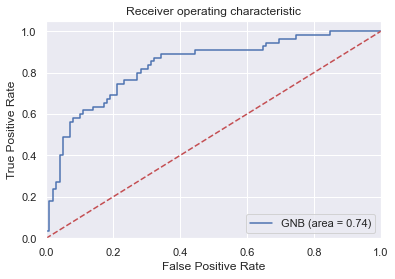

In [49]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
GNB_roc_auc = roc_auc_score(y_test, y_pred_GNB)
fpr, tpr, thresholds = roc_curve(y_test, nbModel_GNB.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'GNB (area = %0.2f)' % GNB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('GNB_ROC')
plt.show()

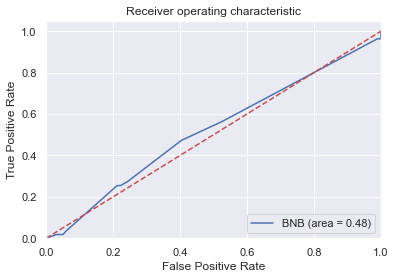

In [50]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
BNB_roc_auc = roc_auc_score(y_test, y_pred_BNB)
fpr, tpr, thresholds = roc_curve(y_test, nbModel_BNB.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'BNB (area = %0.2f)' % BNB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('BNB_ROC')
plt.show()

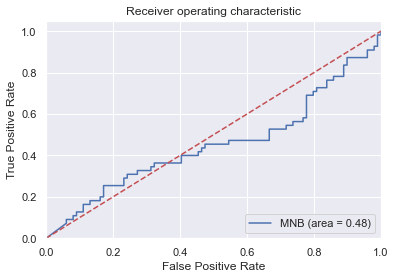

In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
MNB_roc_auc = roc_auc_score(y_test, y_pred_BNB)
fpr, tpr, thresholds = roc_curve(y_test, nbModel_MNB.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'MNB (area = %0.2f)' % MNB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('MNB_ROC')
plt.show()